<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [220]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [296]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [297]:
df.rename({'GRADES_8_G':'ENROLL_8'}, axis=1, inplace=True) # rename total 8 grade enrollment
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace = True) # remove rows without math 8 data
df
#602 data points remain

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,ENROLL_8,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [223]:
array = df["YEAR"].unique()

print(array)
print(len(array))
# the remaining data has 13 unique years

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [224]:
total_mean_score = df.groupby("STATE").AVG_MATH_8_SCORE.mean() # store the mean scores for all states across all years

print("Michigan " + str(total_mean_score['MICHIGAN'])) # print the michigan score
print("Ohio " + str(total_mean_score['OHIO'])) # print the ohio score
# Ohio has a higher average math score across all years

Michigan 276.1666666666667
Ohio 282.25


Find the average for your outcome score across all states in 2019

In [225]:
df.groupby('YEAR').mean().loc[2019].AVG_MATH_8_SCORE # group by year and return the mean score for 2019

281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [226]:
df.groupby("STATE").AVG_MATH_8_SCORE.max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [351]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True) # drop all rows without math 4 score
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True) # drop all rows without reading 4 score
df.dropna(subset=['ENROLL_8'], inplace=True) # drop all values without 8th grade enrollment
df['ENROLL_8_PERCENT'] = df['ENROLL_8'] / df['GRADES_ALL_G'] # create feature grade 8 enrollment as percent of total (NCES estimate)



Final feature list: **4th grade average math score, 4th grade average reading score**

Feature selection justification: **4th grade average math and reading scores were chosen as a predictor because it is likely that students that did well in the 4th grade tests will do well in the 8th grade tests.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='4th grade reding scores', ylabel='8th grade math score'>

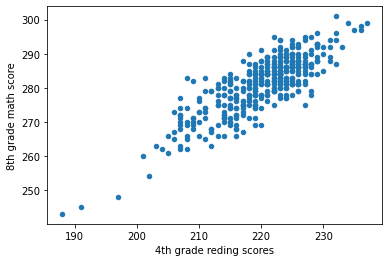

In [306]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_MATH_8_SCORE', xlabel='4th grade reading scores', ylabel='8th grade math score')

**A visualisation of average 8th grade math scores against 4th grade reading scores shows that scores in 4th grade reading could predict scores in 8th grade math**  

**Visualization 2**

<AxesSubplot:xlabel='4th grade math score', ylabel='8th grade math score'>

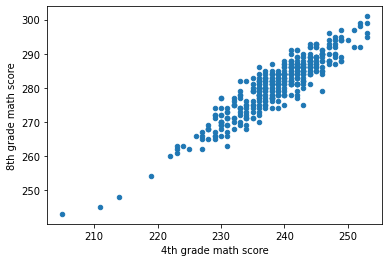

In [308]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_MATH_8_SCORE', xlabel='4th grade math score', ylabel='8th grade math score')

**A visulisation of average 8th grade math scores against average 4th grade math scores. Shows that average 4th grade math scores might be a good predictor of average 8th grade scores**

<AxesSubplot:xlabel='8th grade enrollment', ylabel='8th grade math score'>

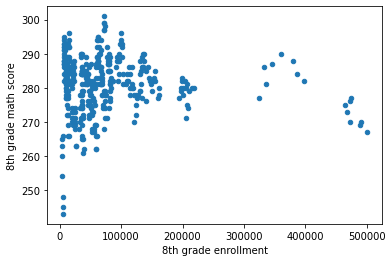

In [354]:
df.plot.scatter(x='ENROLL_8',y='AVG_MATH_8_SCORE', xlabel='8th grade enrollment', ylabel='8th grade math score')

**A visulisation of average 8th grade math scores against total grade 8 enrollment. There appears to be little prediction value**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [309]:
from sklearn.model_selection import train_test_split

In [380]:
X = df[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE']]
y = df.loc[X.index].AVG_MATH_8_SCORE

In [381]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

In [382]:
# import your sklearn class here
from sklearn.linear_model import Ridge

In [383]:
# create your model here
model = Ridge(alpha = 0.1)

In [384]:
model.fit(X_train.values, y_train.values)

Ridge(alpha=0.1)

In [385]:
y_pred = model.predict(X_test.values)

Text(0, 0.5, 'AVG_MATH_8_SCORE')

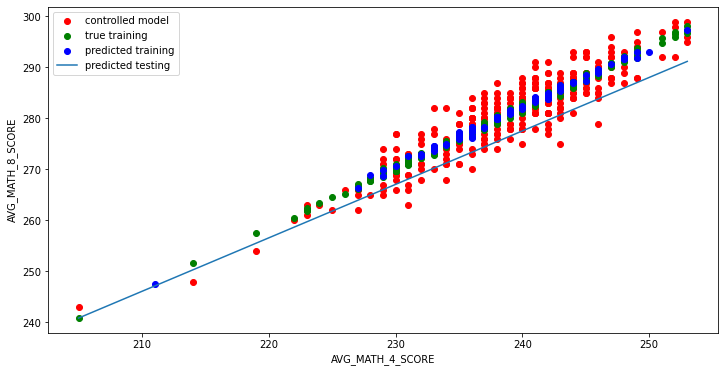

In [386]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_MATH_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train.values), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test.values), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

In [387]:
print(model.intercept_)
print(model.coef_)
print("R-squared: " + str(model.score(X_test.values, y_test.values)))
print("MAE: " + str(np.mean(np.abs(model.predict(X_test.values)-y_test.values))))

-0.5652307823668252
[1.04876865 0.14050899]
R-squared: 0.8631059454524752
MAE: 2.46315546372007


<h2> Summary </h2>
The feature that was chosen for prediction was average 8th grade math scores, consequently the all 8th rows without 8th grade math scores were dropped. Initially there were 3 chosen features for predicting 8th grade math scores, 4th grade math scores, 4th grade reading scores, and 8th grade enrollment as a percent of total enrollment. After some visualisation and model testing, it was removed due to having minimal effect on the model and its accuracy.
<br /> The results show that 4th grade test scores can be used to predict 8th grade math scores with relative accuracy.